In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
# read data
df = pd.read_csv('data/bmi_data_lab3.csv')

In [3]:
# dataset statistical data
print(df.describe(), "\n")

              Age  Height (Inches)  Weight (Pounds)         BMI
count  150.000000       146.000000       150.000000  145.000000
mean    26.413333        80.133994       129.703405    2.751724
std      5.206071        96.579662        88.179891    0.449244
min     18.000000      -130.926162      -161.994913    1.000000
25%     22.000000        66.599598       120.391125    3.000000
50%     26.500000        68.219095       128.538050    3.000000
75%     31.000000        69.432848       136.170900    3.000000
max     35.000000       665.465059      1110.621115    3.000000 



In [4]:
# feature names
print(df.columns.values, '\n')

['Sex' 'Age' 'Height (Inches)' 'Weight (Pounds)' 'BMI'] 



In [5]:
# data types
print(df.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              150 non-null    object 
 1   Age              150 non-null    int64  
 2   Height (Inches)  146 non-null    float64
 3   Weight (Pounds)  150 non-null    float64
 4   BMI              145 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.0+ KB
None 



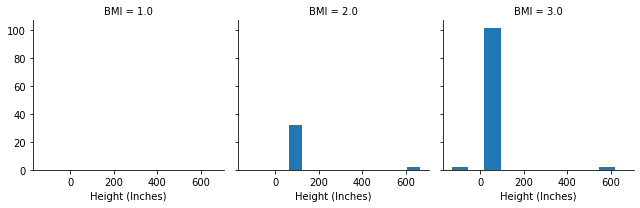

In [6]:
# create histogram for height for each BMI
g1 = sns.FacetGrid(df, col='BMI')
g1.map(plt.hist, 'Height (Inches)', bins=10)

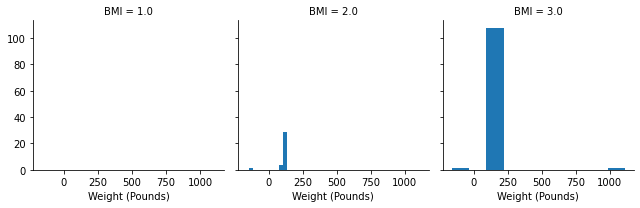

In [7]:
# create histogram for weight for each BMI
g2 = sns.FacetGrid(df, col='BMI')
g2.map(plt.hist, 'Weight (Pounds)', bins=10)

In [8]:
# read data
df_scaler = pd.read_csv('data/bmi_data_lab3.csv');
labelEncoder = LabelEncoder()
labelEncoder.fit(df_scaler['Sex'])
df_scaler['Sex'] = labelEncoder.transform(df_scaler['Sex'])

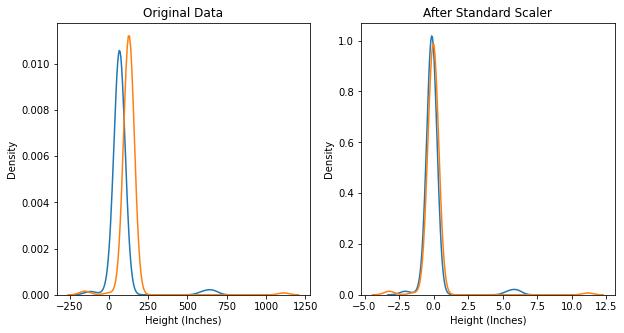

In [9]:
# scaling results for height and weight - StandardScaler
stdScaler = preprocessing.StandardScaler()
stdScaler_df = stdScaler.fit_transform(df_scaler)
stdScaler_df = pd.DataFrame(stdScaler_df, columns=['Sex', 'Age', 'Height (Inches)', 'Weight (Pounds)', 'BMI'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.set_title('Original Data')
sns.kdeplot(df['Height (Inches)'], ax=ax1)
sns.kdeplot(df['Weight (Pounds)'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(stdScaler_df['Height (Inches)'], ax=ax2)
sns.kdeplot(stdScaler_df['Weight (Pounds)'], ax=ax2)
plt.show()

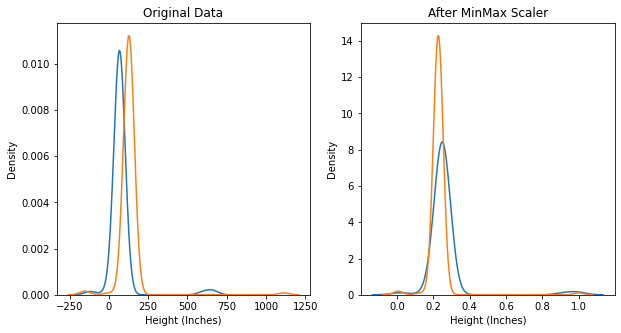

In [10]:
# scaling results for height and weight - MinMaxScaler
minmaxScaler = preprocessing.MinMaxScaler()
minmaxScaler_df = minmaxScaler.fit_transform(df_scaler)
minmaxScaler_df = pd.DataFrame(minmaxScaler_df, columns=['Sex', 'Age', 'Height (Inches)', 'Weight (Pounds)', 'BMI'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.set_title('Original Data')
sns.kdeplot(df['Height (Inches)'], ax=ax1)
sns.kdeplot(df['Weight (Pounds)'], ax=ax1)
ax2.set_title('After MinMax Scaler')
sns.kdeplot(minmaxScaler_df['Height (Inches)'], ax=ax2)
sns.kdeplot(minmaxScaler_df['Weight (Pounds)'], ax=ax2)
plt.show()

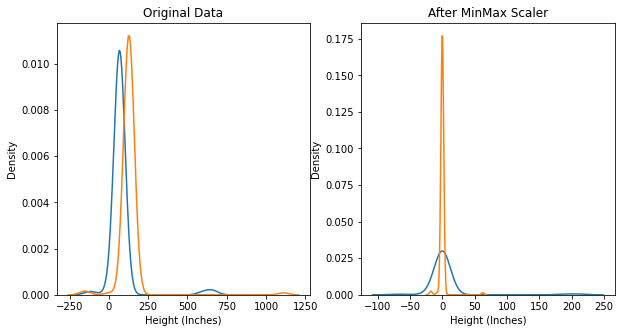

In [11]:
# scaling results for height and weight - RobustScaler
robScaler = preprocessing.RobustScaler()
robScaler_df = robScaler.fit_transform(df_scaler)
robScaler_df = pd.DataFrame(robScaler_df, columns=['Sex', 'Age', 'Height (Inches)', 'Weight (Pounds)', 'BMI'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.set_title('Original Data')
sns.kdeplot(df['Height (Inches)'], ax=ax1)
sns.kdeplot(df['Weight (Pounds)'], ax=ax1)
ax2.set_title('After MinMax Scaler')
sns.kdeplot(robScaler_df['Height (Inches)'], ax=ax2)
sns.kdeplot(robScaler_df['Weight (Pounds)'], ax=ax2)
plt.show()

In [12]:
# read data
df_existNAN = pd.read_csv('data/bmi_data_lab3.csv')

# find dirty data and change to NAN
df_existNAN.replace(0, np.nan, inplace=True)

df_existNAN.loc[df_existNAN['Height (Inches)'] <= 0, 'Height (Inches)'] = np.NAN
df_existNAN.loc[df_existNAN['Height (Inches)'] > 100, 'Height (Inches)'] = np.NAN
df_existNAN.loc[df_existNAN['Weight (Pounds)'] <= 0, 'Weight (Pounds)'] = np.NAN
df_existNAN.loc[df_existNAN['Weight (Pounds)'] > 200, 'Weight (Pounds)'] = np.NAN

# Check if it changed well
df_existNAN

,Sex,Age,Height (Inches),Weight (Pounds),BMI
0,Female,21,65.78331,112.9925,2.0
1,Female,35,NaN,136.4873,3.0
2,Female,27,69.39874,153.0269,3.0
3,Male,24,68.21660,142.3354,3.0
4,Female,18,67.78781,144.2971,3.0
...,...,...,...,...,...
145,Female,20,68.26209,116.4588,2.0
146,Female,28,68.56865,133.8402,3.0
147,Female,30,64.49675,NaN,3.0
148,Male,19,68.71053,130.7568,3.0


In [13]:
# Print of rows with NAN
df_existNAN.isna().sum()

Sex                 0
Age                 0
Height (Inches)    12
Weight (Pounds)     4
BMI                 5
dtype: int64

In [14]:
# Print of columns with NAN
df_existNAN.isna().sum(axis=1)

0      0
1      1
2      0
3      0
4      0
      ..
145    0
146    0
147    1
148    0
149    0
Length: 150, dtype: int64

In [15]:
# Extract all rows without NAN
df_noNAN = df_existNAN.dropna(axis=0, how="any", inplace=False)
df_noNAN.isna().sum()

Sex                0
Age                0
Height (Inches)    0
Weight (Pounds)    0
BMI                0
dtype: int64

In [16]:
# Fill NAN with mean
df_existNAN.fillna(df_noNAN.mean(), inplace=False)

C:\Users\ChungHyunwoo\AppData\Local\Temp\ipykernel_10312\247349544.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_existNAN.fillna(df_noNAN.mean(), inplace=False)


,Sex,Age,Height (Inches),Weight (Pounds),BMI
0,Female,21,65.783310,112.992500,2.0
1,Female,35,68.051393,136.487300,3.0
2,Female,27,69.398740,153.026900,3.0
3,Male,24,68.216600,142.335400,3.0
4,Female,18,67.787810,144.297100,3.0
...,...,...,...,...,...
145,Female,20,68.262090,116.458800,2.0
146,Female,28,68.568650,133.840200,3.0
147,Female,30,64.496750,127.462802,3.0
148,Male,19,68.710530,130.756800,3.0


In [17]:
# Fill NAN with median
df_existNAN.fillna(df_noNAN.median(), inplace=False)

C:\Users\ChungHyunwoo\AppData\Local\Temp\ipykernel_10312\1371159636.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_existNAN.fillna(df_noNAN.median(), inplace=False)


,Sex,Age,Height (Inches),Weight (Pounds),BMI
0,Female,21,65.783310,112.9925,2.0
1,Female,35,68.219095,136.4873,3.0
2,Female,27,69.398740,153.0269,3.0
3,Male,24,68.216600,142.3354,3.0
4,Female,18,67.787810,144.2971,3.0
...,...,...,...,...,...
145,Female,20,68.262090,116.4588,2.0
146,Female,28,68.568650,133.8402,3.0
147,Female,30,64.496750,128.6436,3.0
148,Male,19,68.710530,130.7568,3.0


In [18]:
# Fill NAN with ffill
df_existNAN.fillna(axis=0, method='ffill')

,Sex,Age,Height (Inches),Weight (Pounds),BMI
0,Female,21,65.78331,112.9925,2.0
1,Female,35,65.78331,136.4873,3.0
2,Female,27,69.39874,153.0269,3.0
3,Male,24,68.21660,142.3354,3.0
4,Female,18,67.78781,144.2971,3.0
...,...,...,...,...,...
145,Female,20,68.26209,116.4588,2.0
146,Female,28,68.56865,133.8402,3.0
147,Female,30,64.49675,133.8402,3.0
148,Male,19,68.71053,130.7568,3.0


In [19]:
# Fill NAN with bfill
df_existNAN.fillna(axis=0, method='bfill')

,Sex,Age,Height (Inches),Weight (Pounds),BMI
0,Female,21,65.78331,112.9925,2.0
1,Female,35,69.39874,136.4873,3.0
2,Female,27,69.39874,153.0269,3.0
3,Male,24,68.21660,142.3354,3.0
4,Female,18,67.78781,144.2971,3.0
...,...,...,...,...,...
145,Female,20,68.26209,116.4588,2.0
146,Female,28,68.56865,133.8402,3.0
147,Female,30,64.49675,130.7568,3.0
148,Male,19,68.71053,130.7568,3.0


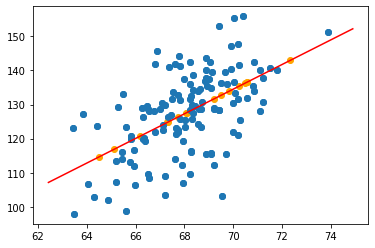

In [20]:
# total dataset using linear regression
df_Linear = df_noNAN.dropna()
x = np.array(df_Linear['Height (Inches)'])
y = np.array(df_Linear['Weight (Pounds)'])
plt.plot(x, y, 'o')
reg = linear_model.LinearRegression()
reg.fit(x[:, np.newaxis], y)
px = np.array([x.min() - 1, x.max() + 1])
py = reg.predict(px[:, np.newaxis])
plt.scatter(x, y)
plt.plot(px, py, color='r')

# Clean the dirty values using linear regression
df_LinearNAN = pd.read_csv('data/bmi_data_lab3.csv')
df_LinearNAN.loc[df_LinearNAN['Height (Inches)'] <= 0, 'Height (Inches)'] = np.NAN
df_LinearNAN.loc[df_LinearNAN['Height (Inches)'] > 100, 'Height (Inches)'] = np.NAN
df_LinearNAN.loc[df_LinearNAN['Weight (Pounds)'] <= 0, 'Weight (Pounds)'] = np.NAN
df_LinearNAN.loc[df_LinearNAN['Weight (Pounds)'] > 200, 'Weight (Pounds)'] = np.NAN

for x in df_LinearNAN.index:
    # If Height data is NAN
    if np.isnan(df_LinearNAN.loc[x, "Height (Inches)"]):
        # weight = (height-w)*x using this function, we can predict height
        df_LinearNAN.loc[x, "Height (Inches)"] = (df_LinearNAN.loc[x, "Weight (Pounds)"] - reg.intercept_) / reg.coef_
        plt.scatter([df_LinearNAN.loc[x, "Height (Inches)"]], [df_LinearNAN.loc[x, "Weight (Pounds)"]], color="orange")
    # If Weight data is NAN
    if np.isnan(df_LinearNAN.loc[x, "Weight (Pounds)"]):
        # weight = (height-w)*x using this function, we can predict weight
        df_LinearNAN.loc[x, "Weight (Pounds)"] = reg.predict([[df_LinearNAN.loc[x, "Height (Inches)"]]])
        plt.scatter([df_LinearNAN.loc[x, "Height (Inches)"]], [df_LinearNAN.loc[x, "Weight (Pounds)"]], color="orange")

plt.show()

In [21]:
# Divide data for each gender
df_male = df_LinearNAN.query("Sex == 'Male'")
male_x = df_male['Height (Inches)']
male_y = df_male['Weight (Pounds)']

df_female = df_LinearNAN.query("Sex == 'Female'")
female_x = df_female['Height (Inches)']
female_y = df_female['Weight (Pounds)']

C:\Users\ChungHyunwoo\AppData\Local\Temp\ipykernel_10312\1250904503.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  reg.fit(male_x[:, np.newaxis], male_y)


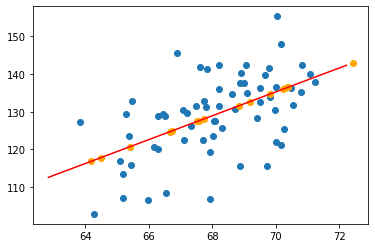

In [22]:
# Male
reg = linear_model.LinearRegression()
reg.fit(male_x[:, np.newaxis], male_y)
px = np.array([male_x.min() - 1, male_x.max() + 1])
py = reg.predict(px[:, np.newaxis])
plt.scatter(male_x, male_y)
plt.plot(px, py, color='r')

df_male = pd.read_csv('data/bmi_data_lab3.csv')
df_male.loc[df_male['Height (Inches)'] <= 0, 'Height (Inches)'] = np.NAN
df_male.loc[df_male['Height (Inches)'] > 100, 'Height (Inches)'] = np.NAN
df_male.loc[df_male['Weight (Pounds)'] <= 0, 'Weight (Pounds)'] = np.NAN
df_male.loc[df_male['Weight (Pounds)'] > 200, 'Weight (Pounds)'] = np.NAN

for x in df_male.index:
    # If Height data is NAN
    if np.isnan(df_male.loc[x, "Height (Inches)"]):
        # weight = (height-w)*x using this function, we can predict height
        df_male.loc[x, "Height (Inches)"] = (df_male.loc[x, "Weight (Pounds)"] - reg.intercept_) / reg.coef_
        plt.scatter([df_male.loc[x, "Height (Inches)"]], [df_male.loc[x, "Weight (Pounds)"]], color="orange")
    # If Height data is NAN
    if np.isnan(df_male.loc[x, "Weight (Pounds)"]):
        # weight = (height-w)*x using this function, we can predict weight
        df_male.loc[x, "Weight (Pounds)"] = reg.predict([[df_male.loc[x, "Height (Inches)"]]])
        plt.scatter([df_male.loc[x, "Height (Inches)"]], [df_male.loc[x, "Weight (Pounds)"]], color="orange")

plt.show()

C:\Users\ChungHyunwoo\AppData\Local\Temp\ipykernel_10312\4181518883.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  reg.fit(female_x[:, np.newaxis], female_y)


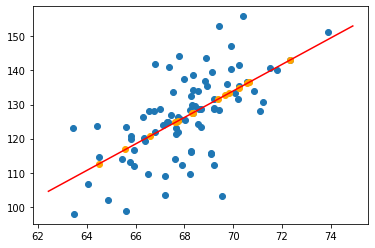

In [23]:
# Female
reg = linear_model.LinearRegression()
reg.fit(female_x[:, np.newaxis], female_y)
px = np.array([female_x.min() - 1, female_x.max() + 1])
py = reg.predict(px[:, np.newaxis])
plt.scatter(female_x, female_y)
plt.plot(px, py, color='r')

df_female = pd.read_csv('data/bmi_data_lab3.csv')
df_female.loc[df_female['Height (Inches)'] <= 0, 'Height (Inches)'] = np.NAN
df_female.loc[df_female['Height (Inches)'] > 100, 'Height (Inches)'] = np.NAN
df_female.loc[df_female['Weight (Pounds)'] <= 0, 'Weight (Pounds)'] = np.NAN
df_female.loc[df_female['Weight (Pounds)'] > 200, 'Weight (Pounds)'] = np.NAN

for x in df_female.index:
    # If Height data is NAN
    if np.isnan(df_female.loc[x, "Height (Inches)"]):
        # weight = (height-w)*x using this function, we can predict height
        df_female.loc[x, "Height (Inches)"] = (df_female.loc[x, "Weight (Pounds)"] - reg.intercept_) / reg.coef_
        plt.scatter([df_female.loc[x, "Height (Inches)"]], [df_female.loc[x, "Weight (Pounds)"]], color="orange")
    # If Height data is NAN
    if np.isnan(df_female.loc[x, "Weight (Pounds)"]):
        # weight = (height-w)*x using this function, we can predict weight
        df_female.loc[x, "Weight (Pounds)"] = reg.predict([[df_female.loc[x, "Height (Inches)"]]])
        plt.scatter([df_female.loc[x, "Height (Inches)"]], [df_female.loc[x, "Weight (Pounds)"]], color="orange")

plt.show()

In [24]:
# Divide data for each BMI
df_bmi1 = df_LinearNAN.query("BMI == 1")
bmi1_x = df_bmi1['Height (Inches)']
bmi1_y = df_bmi1['Weight (Pounds)']

df_bmi2 = df_LinearNAN.query("BMI == 2")
bmi2_x = df_bmi2['Height (Inches)']
bmi2_y = df_bmi2['Weight (Pounds)']

df_bmi2 = df_LinearNAN.query("BMI == 3")
bmi3_x = df_bmi2['Height (Inches)']
bmi3_y = df_bmi2['Weight (Pounds)']

C:\Users\ChungHyunwoo\AppData\Local\Temp\ipykernel_10312\98852365.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  reg.fit(bmi1_x[:, np.newaxis], bmi1_y)
C:\Users\ChungHyunwoo\AppData\Local\Temp\ipykernel_10312\98852365.py:17: RuntimeWarning: divide by zero encountered in true_divide
  df_bmi1.loc[x, "Height (Inches)"] = (df_bmi1.loc[x, "Weight (Pounds)"] - reg.intercept_) / reg.coef_
C:\Users\ChungHyunwoo\AppData\Local\Temp\ipykernel_10312\98852365.py:17: RuntimeWarning: divide by zero encountered in true_divide
  df_bmi1.loc[x, "Height (Inches)"] = (df_bmi1.loc[x, "Weight (Pounds)"] - reg.intercept_) / reg.coef_
C:\Users\ChungHyunwoo\AppData\Local\Temp\ipykernel_10312\98852365.py:17: RuntimeWarning: divide by zero encountered in true_divide
  df_bmi1.loc[x, "Height (Inches)"] = (df_bmi1.loc[x, "Weight (Pounds)"] - reg.intercept_) / reg.coef_


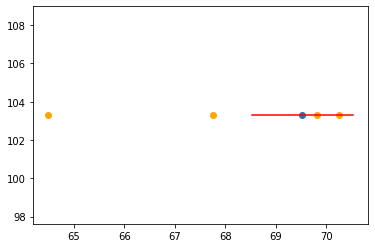

In [25]:
#BMI 1
reg = linear_model.LinearRegression()
reg.fit(bmi1_x[:, np.newaxis], bmi1_y)
px = np.array([bmi1_x.min() - 1, bmi1_x.max() + 1])
py = reg.predict(px[:, np.newaxis])
plt.scatter(bmi1_x, bmi1_y)
plt.plot(px, py, color='r')

df_bmi1 = pd.read_csv('data/bmi_data_lab3.csv')
df_bmi1.loc[df_bmi1['Height (Inches)'] <= 0, 'Height (Inches)'] = np.NAN
df_bmi1.loc[df_bmi1['Height (Inches)'] > 100, 'Height (Inches)'] = np.NAN
df_bmi1.loc[df_bmi1['Weight (Pounds)'] <= 0, 'Weight (Pounds)'] = np.NAN
df_bmi1.loc[df_bmi1['Weight (Pounds)'] > 200, 'Weight (Pounds)'] = np.NAN

for x in df_bmi1.index:
    if np.isnan(df_bmi1.loc[x, "Height (Inches)"]):
        df_bmi1.loc[x, "Height (Inches)"] = (df_bmi1.loc[x, "Weight (Pounds)"] - reg.intercept_) / reg.coef_
        plt.scatter([df_bmi1.loc[x, "Height (Inches)"]], [df_bmi1.loc[x, "Weight (Pounds)"]], color="orange")
    if np.isnan(df_bmi1.loc[x, "Weight (Pounds)"]):
        df_bmi1.loc[x, "Weight (Pounds)"] = reg.predict([[df_bmi1.loc[x, "Height (Inches)"]]])
        plt.scatter([df_bmi1.loc[x, "Height (Inches)"]], [df_bmi1.loc[x, "Weight (Pounds)"]], color="orange")

plt.show()

C:\Users\ChungHyunwoo\AppData\Local\Temp\ipykernel_10312\1866610717.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  reg.fit(bmi2_x[:, np.newaxis], bmi2_y)


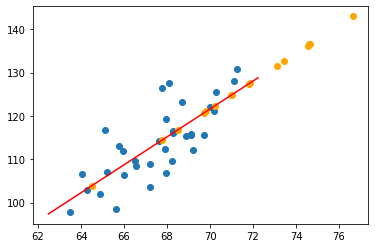

In [26]:
#BMI 2
reg = linear_model.LinearRegression()
reg.fit(bmi2_x[:, np.newaxis], bmi2_y)
px = np.array([bmi2_x.min() - 1, bmi2_x.max() + 1])
py = reg.predict(px[:, np.newaxis])
plt.scatter(bmi2_x, bmi2_y)
plt.plot(px, py, color='r')

df_bmi2 = pd.read_csv('data/bmi_data_lab3.csv')
df_bmi2.loc[df_bmi2['Height (Inches)'] <= 0, 'Height (Inches)'] = np.NAN
df_bmi2.loc[df_bmi2['Height (Inches)'] > 100, 'Height (Inches)'] = np.NAN
df_bmi2.loc[df_bmi2['Weight (Pounds)'] <= 0, 'Weight (Pounds)'] = np.NAN
df_bmi2.loc[df_bmi2['Weight (Pounds)'] > 200, 'Weight (Pounds)'] = np.NAN

for x in df_bmi2.index:
    if np.isnan(df_bmi2.loc[x, "Height (Inches)"]):
        df_bmi2.loc[x, "Height (Inches)"] = (df_bmi2.loc[x, "Weight (Pounds)"] - reg.intercept_) / reg.coef_
        plt.scatter([df_bmi2.loc[x, "Height (Inches)"]], [df_bmi2.loc[x, "Weight (Pounds)"]], color="orange")
    if np.isnan(df_bmi2.loc[x, "Weight (Pounds)"]):
        df_bmi2.loc[x, "Weight (Pounds)"] = reg.predict([[df_bmi2.loc[x, "Height (Inches)"]]])
        plt.scatter([df_bmi2.loc[x, "Height (Inches)"]], [df_bmi2.loc[x, "Weight (Pounds)"]], color="orange")

plt.show()

C:\Users\ChungHyunwoo\AppData\Local\Temp\ipykernel_10312\2944968049.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  reg.fit(bmi3_x[:, np.newaxis], bmi3_y)


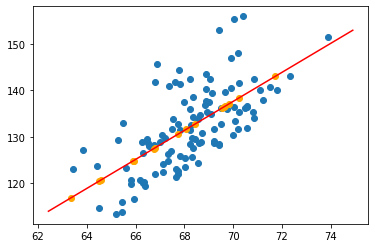

In [27]:
#BMI 3
reg = linear_model.LinearRegression()
reg.fit(bmi3_x[:, np.newaxis], bmi3_y)
px = np.array([bmi3_x.min() - 1, bmi3_x.max() + 1])
py = reg.predict(px[:, np.newaxis])
plt.scatter(bmi3_x, bmi3_y)
plt.plot(px, py, color='r')

df_bmi3 = pd.read_csv('data/bmi_data_lab3.csv')
df_bmi3.loc[df_bmi3['Height (Inches)'] <= 0, 'Height (Inches)'] = np.NAN
df_bmi3.loc[df_bmi3['Height (Inches)'] > 100, 'Height (Inches)'] = np.NAN
df_bmi3.loc[df_bmi3['Weight (Pounds)'] <= 0, 'Weight (Pounds)'] = np.NAN
df_bmi3.loc[df_bmi3['Weight (Pounds)'] > 200, 'Weight (Pounds)'] = np.NAN

for x in df_bmi3.index:
    if np.isnan(df_bmi3.loc[x, "Height (Inches)"]):
        df_bmi3.loc[x, "Height (Inches)"] = (df_bmi3.loc[x, "Weight (Pounds)"] - reg.intercept_) / reg.coef_
        plt.scatter([df_bmi3.loc[x, "Height (Inches)"]], [df_bmi3.loc[x, "Weight (Pounds)"]], color="orange")
    if np.isnan(df_bmi3.loc[x, "Weight (Pounds)"]):
        df_bmi3.loc[x, "Weight (Pounds)"] = reg.predict([[df_bmi3.loc[x, "Height (Inches)"]]])
        plt.scatter([df_bmi3.loc[x, "Height (Inches)"]], [df_bmi3.loc[x, "Weight (Pounds)"]], color="orange")

plt.show()